In [42]:
"""
Import packages
"""
import uproot
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

print("Your uproot version: ", uproot.__version__)
print("Info: uproot 4+ is recommended.")

#give path to the simulation output .root file
f = uproot.open('/home/amslivar/work/AmBe_v2/data/AmBe_emer_gamma/4438_outcapsule.root')
f.classnames()




Your uproot version:  5.0.13
Info: uproot 4+ is recommended.


{'tcapsule;3': 'TTree', 'tcapsule;2': 'TTree'}

In [43]:
f['tcapsule;3'].show()

t = f['tcapsule;3']
rq = t.arrays(library='np')


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Eemission            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
nemission            | int32_t                  | AsDtype('>i4')
idpdgemission        | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
costhemission        | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
E0capsule            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
ncapsuleprimary      | int32_t                  | AsDtype('>i4')
x0capsule            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
y0capsule            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
z0capsule            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...


In [44]:
EmergentGammas = rq['Eemission']
PrimaryGammas = rq['E0capsule']

print(len(PrimaryGammas))
EmergentGammas = np.concatenate( list(EmergentGammas), axis=0 )
PrimaryGammas = np.concatenate( list(PrimaryGammas), axis=0 )

EmergentGammas = EmergentGammas.flatten()
PrimaryGammas = PrimaryGammas.flatten()

print(type(EmergentGammas))
print(EmergentGammas)

print(len(PrimaryGammas))

1000000
<class 'numpy.ndarray'>
[3269.85274258 4438.0014025  4438.00253701 ... 4052.96749533 1902.83814284
 4438.00021607]
1000000


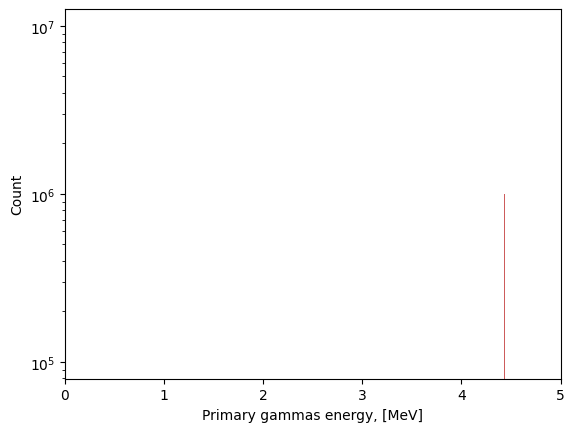

In [45]:
#plot primary gammas' spectrum


plt.hist(PrimaryGammas/1000, bins=500, range=(0, 5), color='indianred')
plt.xlabel('Primary gammas energy, [MeV]')
plt.ylabel('Count')
plt.xlim(0,5)
plt.yscale('log')
#plt.savefig("Primary_gammas_AmBe_wo_4438keV.png", bbox_inches ='tight')
plt.show()

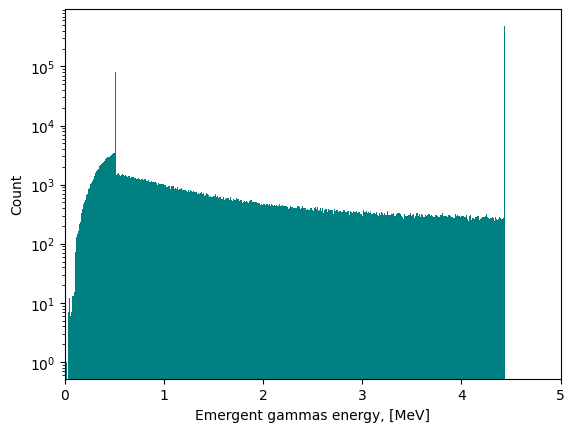

In [46]:
#plot detected gammas' spectrum


plt.hist(EmergentGammas/1000, bins=500, range=(0, 5), color='teal')
plt.xlabel('Emergent gammas energy, [MeV]')
plt.ylabel('Count')
plt.xlim(0,5)
#plt.ylim(1,2e8)
plt.yscale('log')
#plt.savefig("Emergent_gammas_AmBe_wo_4438keV.png", bbox_inches ='tight')
plt.show()

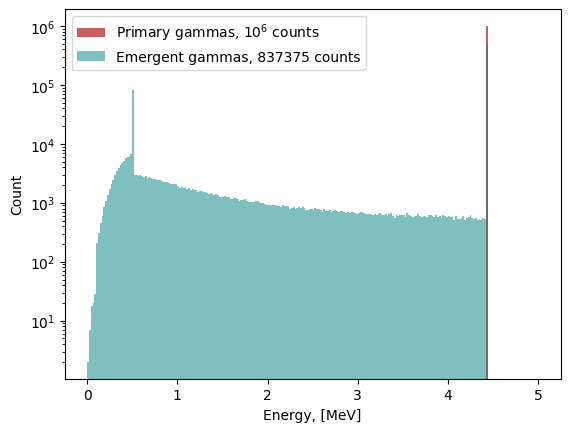

In [47]:
plt.hist(PrimaryGammas/1000, bins=250, range=(0, 5), color='indianred', label=r'Primary gammas, $10^6$ counts')
plt.hist(EmergentGammas/1000, bins=250, range=(0, 5), color='teal', alpha=0.5, label='Emergent gammas + electrons, {} counts'.format(len(EmergentGammas)))
plt.xlabel('Energy, [MeV]')
plt.ylabel('Count')
plt.legend()
#.xlim(0,1)
plt.yscale('log')
#plt.savefig("Primary_and_emergent_gammas_AmBe_wo_4438keV.png", bbox_inches ='tight')
plt.show()

In [54]:

PID = rq['idpdgemission']

print(len(PrimaryGammas))
PID = np.concatenate( list(PID), axis=0 )

PID = PID.flatten()

print(type(PID))
print(PID)

#for i in range(0, len(PID)):
#        print(PID[i])

1000000
<class 'numpy.ndarray'>
[22 22 22 ... 22 22 22]


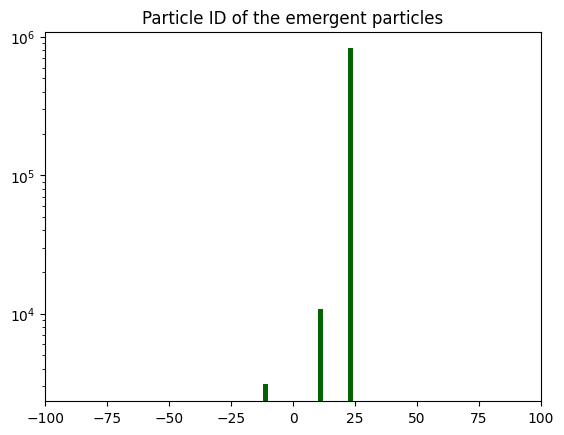

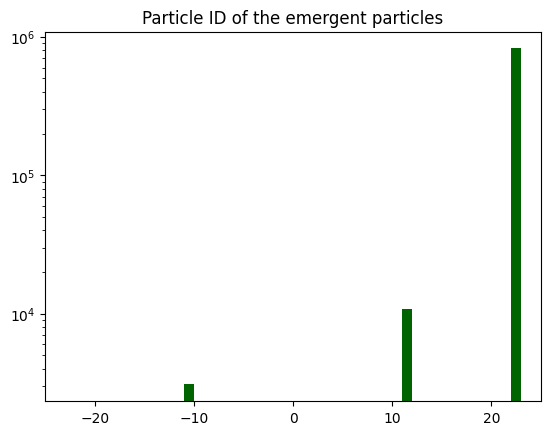

In [55]:

plt.hist(PID, bins=100, range=(-100, 100), color='darkgreen')
plt.yscale('log')
plt.xlim(-100,100)
#plt.xlim(0,40)
plt.title('Particle ID of the emergent particles')
plt.show()

plt.hist(PID, bins=200, range=(-100, 100), color='darkgreen')
plt.yscale('log')
plt.xlim(-25,25)
#plt.xlim(0,40)
plt.title('Particle ID of the emergent particles')
plt.show()

In [56]:
only_e_emergent = []
only_g_emergent = []
else_emergent = []
other_PID = []

for i in range(0, len(PID)):
    if PID[i] == 11 or PID[i] == -11:
        only_e_emergent.append(rq['Eemission'][i])
    elif PID[i] == 22:
        only_g_emergent.append(rq['Eemission'][i])
    else  :
        else_emergent.append(rq['Eemission'][i])
        other_PID.append(PID[i])
        

only_e_emergent = np.concatenate( list(only_e_emergent), axis=0 )
only_g_emergent = np.concatenate( list(only_g_emergent), axis=0 )
#else_emergent = np.concatenate( list(else_emergent), axis=0 )

only_g_emergent = only_g_emergent.flatten()
only_e_emergent = only_e_emergent.flatten()
#else_emergent = else_emergent.flatten()

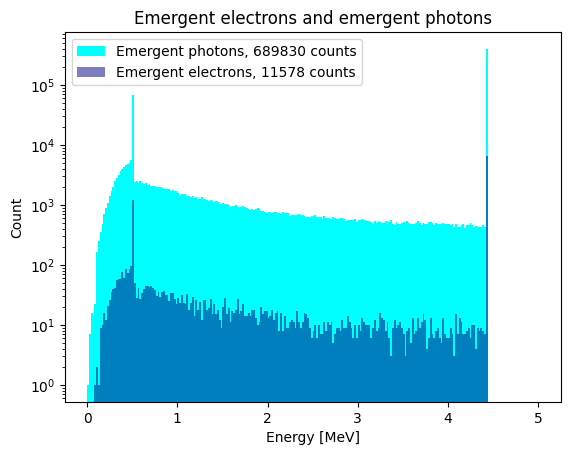

In [59]:
plt.hist(only_g_emergent/1000, bins=250, range=(0, 5), color='cyan', label=r'Emergent photons, {} counts'.format(len(only_g_emergent)))
plt.hist(only_e_emergent/1000, bins=250, range=(0, 5), color='navy', alpha=0.5, label='Emergent electrons, {} counts'.format(len(only_e_emergent)))
plt.xlabel('Energy [MeV]')
plt.ylabel('Count')
plt.legend()
#.xlim(0,1)
plt.yscale('log')
plt.title('Emergent electrons and emergent photons')
#plt.savefig("Primary_and_emergent_gammas_AmBe_wo_4438keV.png", bbox_inches ='tight')
plt.show()

In [58]:
print("Number of emergent electrons or positrons:", len(only_e_emergent))
print("Number of emergent photons:", len(only_g_emergent))

print("Total number of emergent particles (photons + electrons + positrons):", len(only_e_emergent) + len(only_g_emergent))

print("Total number of other emergent particles:", len(else_emergent))

print("Total number of primary particles:", len(PrimaryGammas))
print("Total number of emergent particles, no PID selection:", len(EmergentGammas))


Number of emergent electrons or positrons: 11578
Number of emergent photons: 689830
Total number of emergent particles (photons + electrons + positrons): 701408
Total number of other emergent particles: 0
Total number of primary particles: 1000000
Total number of emergent particles, no PID selection: 837375


Total number of emergent particles = total number of particles ID'd. So there it makes no sense to have "e_only_primary" - only compare to the primary number of particles PrimaryGammas. 

I am not sure why the photons + electrons + positrons did not add up to all particles. 



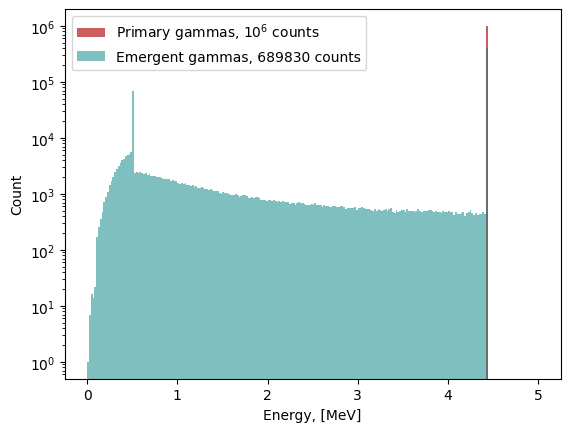

In [60]:
plt.hist(PrimaryGammas/1000, bins=250, range=(0, 5), color='indianred', label=r'Primary gammas, $10^6$ counts')
plt.hist(only_g_emergent/1000, bins=250, range=(0, 5), color='teal', alpha=0.5, label='Emergent gammas, {} counts'.format(len(only_g_emergent)))
plt.xlabel('Energy, [MeV]')
plt.ylabel('Count')
plt.legend()
#.xlim(0,1)
plt.yscale('log')
#plt.savefig("Primary_and_emergent_gammas_AmBe_wo_4438keV.png", bbox_inches ='tight')
plt.show()

In [62]:
print(len(only_g_emergent))
print(len(PrimaryGammas))
print(len(only_g_emergent)/len(PrimaryGammas))

689830
1000000
0.68983
